In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [26]:
train_path = "../dataset/preprocessed/netflix_train.csv"
val_path = "../dataset/preprocessed/netflix_val.csv"
test_path = "../dataset/preprocessed/netflix_test.csv"

train_data = pd.read_csv(train_path)
val_data = pd.read_csv(val_path)
test_data = pd.read_csv(test_path)


max_words = 500
max_len = 20

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(train_data['title'] + ' ' + train_data['description'])

X_train = pad_sequences(tokenizer.texts_to_sequences(train_data['title'] + ' ' + train_data['description']), maxlen=max_len)
X_val = pad_sequences(tokenizer.texts_to_sequences(val_data['title'] + ' ' + val_data['description']), maxlen=max_len)
X_test = pad_sequences(tokenizer.texts_to_sequences(test_data['title'] + ' ' + test_data['description']), maxlen=max_len)


label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(train_data['target_ages'])
y_val = label_encoder.transform(val_data['target_ages'])
y_test = label_encoder.transform(test_data['target_ages'])
print(y_train.shape)
print(y_train)
print(len(y_train))
print(y_val.shape)
print(y_val)
print(len(y_val))

(6155,)
[3 0 2 ... 0 3 0]
6155
(1319,)
[3 0 0 ... 3 0 0]
1319


In [27]:
model = keras.Sequential([
    keras.layers.Embedding(input_dim=max_words, output_dim=20, input_length=max_len),
    keras.layers.LSTM(128, dropout=0.2, recurrent_dropout=0.2),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(len(label_encoder.classes_), activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [28]:
history = model.fit(X_train, y_train, epochs=8, batch_size=64, validation_data=(X_val, y_val))

Epoch 1/8
97/97 [==============================] - 4s 21ms/step - loss: 1.2011 - accuracy: 0.4624 - val_loss: 1.1569 - val_accuracy: 0.4655
Epoch 2/8
97/97 [==============================] - 2s 19ms/step - loss: 1.0790 - accuracy: 0.4965 - val_loss: 1.0851 - val_accuracy: 0.4822
Epoch 3/8
97/97 [==============================] - 2s 19ms/step - loss: 1.0304 - accuracy: 0.5173 - val_loss: 1.0744 - val_accuracy: 0.4920
Epoch 4/8
97/97 [==============================] - 2s 19ms/step - loss: 1.0080 - accuracy: 0.5313 - val_loss: 1.0794 - val_accuracy: 0.4882
Epoch 5/8
97/97 [==============================] - 2s 19ms/step - loss: 0.9960 - accuracy: 0.5391 - val_loss: 1.0661 - val_accuracy: 0.4973
Epoch 6/8
97/97 [==============================] - 2s 19ms/step - loss: 0.9805 - accuracy: 0.5503 - val_loss: 1.0827 - val_accuracy: 0.4973
Epoch 7/8
97/97 [==============================] - 2s 19ms/step - loss: 0.9691 - accuracy: 0.5579 - val_loss: 1.0732 - val_accuracy: 0.4875
Epoch 8/8
97/97 [===

In [29]:
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=-1)
y_test_classes = y_test


loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy * 100:.2f}%')

42/42 [==============================] - 0s 4ms/step
Test Loss: 1.0710
Test Accuracy: 51.29%


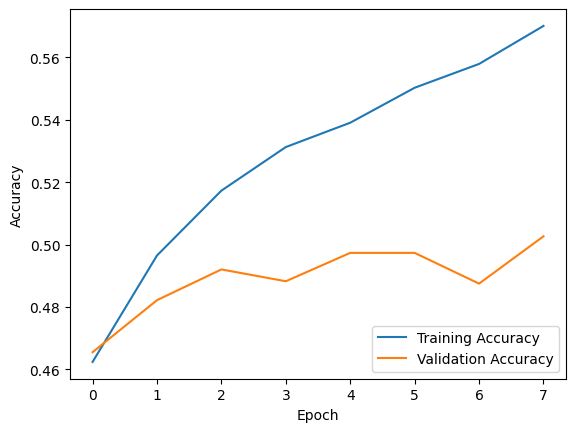

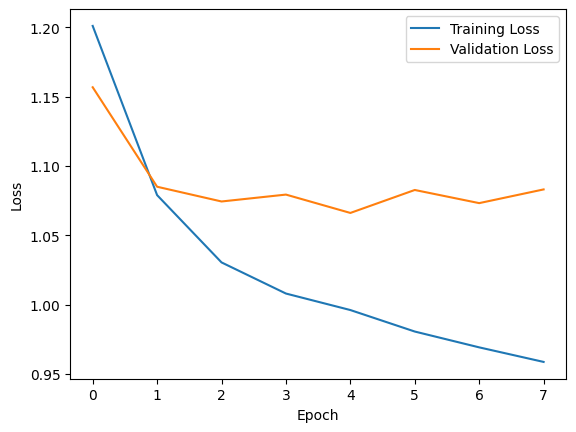

              precision    recall  f1-score   support

      Adults       0.54      0.87      0.67       614
        Kids       0.57      0.28      0.38        85
  Older Kids       0.38      0.27      0.32       223
       Teens       0.45      0.15      0.22       398

    accuracy                           0.51      1320
   macro avg       0.49      0.39      0.40      1320
weighted avg       0.49      0.51      0.45      1320



In [30]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

print(classification_report(y_test_classes, y_pred_classes, target_names=label_encoder.classes_))